# 모둠 분류기 | 앙상블

In [22]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from xgboost import XGBClassifier
import time

In [14]:
training_data = pd.read_csv('./fashionmnist/fashion-mnist_train.csv')

X_test = training_data['label']
X_train = training_data.drop('label',axis=1)

test_data = pd.read_csv('./fashionmnist/fashion-mnist_test.csv')

y_test = test_data.drop('label',axis=1)

## normalization  
- 0,255사이의 값을 0,1사이의 값으로 정규화 시켜줘야 작업속도가 빨라집니다.

In [15]:
X_train = X_train.astype('float32')
y_test = y_test.astype('float32')
X_train /= 255.0
y_test /=255.0

In [16]:
seed = 99
np.random.seed(seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  X_test, 
                                                  test_size=0.1, 
                                                  random_state = seed)

# PCA를 통한 차원축소
- 작업량 감소 + 이상치(외톨이, outlier)  
- 데이터 셋을 대표할 수 있는 특성의 수를 줄인다. -> 주성분 수 감소 -> 차원 감소  

In [17]:
pca = PCA(n_components=100, random_state=42)
X_train_pca =pca.fit_transform(X_train)
X_test_pca = pca.transform(X_val)
y_test_pca =pca.transform(y_test)

In [19]:
X_train_PCA1 = pd.DataFrame(X_train_pca)
X_test_PCA1 = pd.DataFrame(X_test_pca)

# 각 분류모델 평가하기  
1. 로지스틱 회귀  
2. SVM  
3. 랜덤 포래스트  
4. Gradient boosting  
5. XGBoost

In [20]:
# 1. LR Model
start1 = time.time()

logistic = LogisticRegression(max_iter=200, solver='liblinear')
logistic.fit(X_train_PCA1, y_train)

end1 = time.time()
lr_time = end1-start1

# 2. SVC Model
start2 = time.time()

svc = SVC(C=13,kernel='rbf',gamma="auto",probability = True)
svc.fit(X_train_PCA1, y_train)

end2 = time.time()
svm_time = end2-start2

# 3. Random Forest
start3 = time.time()

random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, n_estimators=100)
random_forest.fit(X_train_PCA1, y_train)

end3 = time.time()
forest_time = end3-start3

# 4. Gradient Boosting Method 
start4 = time.time()

Gradient = ensemble.GradientBoostingClassifier(n_estimators=100)
Gradient.fit(X_train_PCA1, y_train)

end4 = time.time()
gradient_time = end4-start4

# 5. XGBoost Method
start5 = time.time()

xgb = XGBClassifier(use_label_encoder=False,objective="multi:softmax",eval_metric="merror")
xgb.fit(X_train_PCA1, y_train.ravel())

end5 = time.time()
xgb_time = end5-start5


print("LR Time: {:0.2f} minute".format(lr_time/60.0))
print("SVC Time: {:0.2f} minute".format(svm_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Gradient Boosting Time: {:0.2f} minute".format(gradient_time/60.0))
print("XGBoost Time: {:0.2f} minute".format(xgb_time/60.0))

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:32

LR Time: 0.42 minute
SVC Time: 1.49 minute
Random Forest Time: 1.23 minute
Gradient Boosting Time: 29.04 minute
XGBoost Time: 0.97 minute


# 모델을 통해 추론하기.

- 로지스틱 회귀

In [23]:
#
y_train_lr = logistic.predict(X_train_PCA1)
y_pred_lr = logistic.predict(X_test_pca)
logistic_train = metrics.accuracy_score(y_train,y_train_lr )
logistic_accuracy = metrics.accuracy_score(y_val, y_pred_lr)

print("Train Accuracy score: {}".format(logistic_train))
print("Test Accuracy score: {}".format(logistic_accuracy))
print(metrics.classification_report(y_val, y_pred_lr))

Train Accuracy score: 0.8461851851851852
Test Accuracy score: 0.851
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       574
           1       0.97      0.96      0.97       596
           2       0.76      0.76      0.76       573
           3       0.86      0.88      0.87       624
           4       0.77      0.78      0.78       635
           5       0.95      0.91      0.93       632
           6       0.64      0.58      0.61       600
           7       0.90      0.93      0.91       604
           8       0.92      0.93      0.93       598
           9       0.94      0.95      0.94       564

    accuracy                           0.85      6000
   macro avg       0.85      0.85      0.85      6000
weighted avg       0.85      0.85      0.85      6000



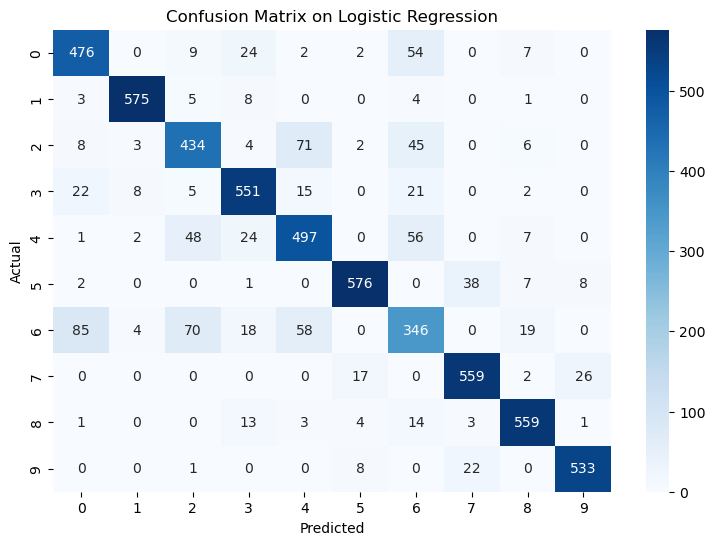

<Figure size 640x480 with 0 Axes>

In [24]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_lr, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()
plt.savefig('Confusion Matrix LR.png')

- SVM

In [25]:
y_train_svc = svc.predict(X_train_PCA1)
y_pred_svc = svc.predict(X_test_pca)
svc_train = metrics.accuracy_score(y_train,y_train_svc)
svc_accuracy = metrics.accuracy_score(y_val, y_pred_svc)

print("Train Accuracy score: {}".format(svc_train))
print("Test Accuracy score: {}".format(svc_accuracy))
print(metrics.classification_report(y_val, y_pred_svc))

Train Accuracy score: 0.9425555555555556
Test Accuracy score: 0.906
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       574
           1       0.99      0.98      0.99       596
           2       0.83      0.85      0.84       573
           3       0.91      0.93      0.92       624
           4       0.86      0.85      0.85       635
           5       0.98      0.95      0.96       632
           6       0.76      0.74      0.75       600
           7       0.93      0.97      0.95       604
           8       0.97      0.97      0.97       598
           9       0.97      0.96      0.96       564

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



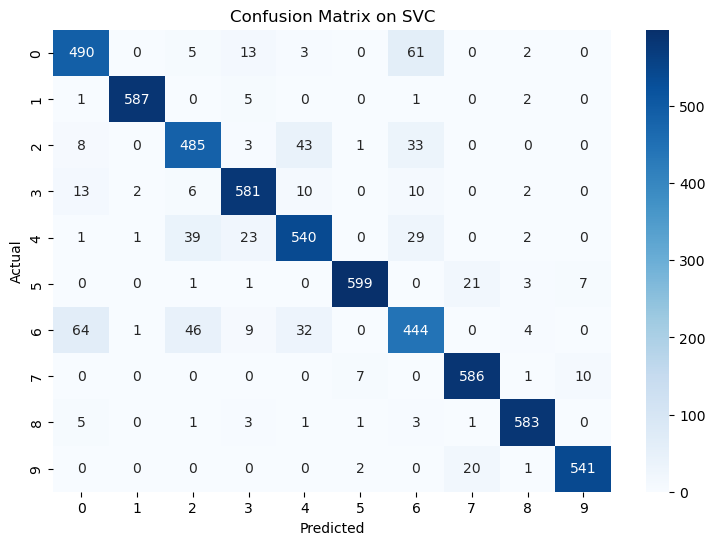

<Figure size 640x480 with 0 Axes>

In [40]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svc, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on SVC")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()
plt.savefig('Confusion Matrix SVM.png')

- Random forest

In [27]:
y_train_forest = random_forest.predict(X_train_PCA1)
y_pred_forest = random_forest.predict(X_test_pca)
random_forest_train = metrics.accuracy_score(y_train,y_train_forest)
random_forest_accuracy = metrics.accuracy_score(y_val, y_pred_forest)

print("Train Accuracy score: {}".format(random_forest_train))
print("Test Accuracy score: {}".format(random_forest_accuracy))
print(metrics.classification_report(y_val, y_pred_forest))

Train Accuracy score: 1.0
Test Accuracy score: 0.8748333333333334
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       574
           1       1.00      0.96      0.98       596
           2       0.77      0.82      0.80       573
           3       0.88      0.91      0.90       624
           4       0.81      0.83      0.82       635
           5       0.94      0.93      0.93       632
           6       0.73      0.60      0.66       600
           7       0.92      0.94      0.93       604
           8       0.94      0.96      0.95       598
           9       0.94      0.95      0.94       564

    accuracy                           0.87      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.87      0.87      6000



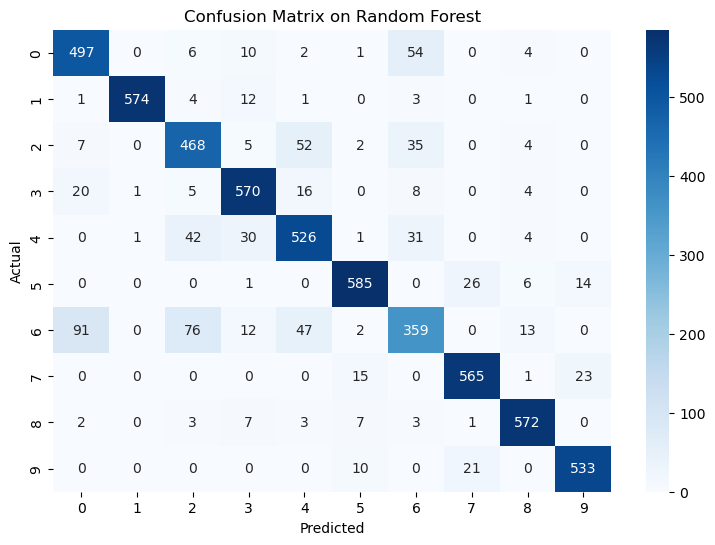

<Figure size 640x480 with 0 Axes>

In [41]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_forest, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Random Forest")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()
plt.savefig('Confusion Matrix Random Forest.png')

- Gradient Boosting

In [29]:
y_train_gradient = Gradient.predict(X_train_PCA1)
y_pred_gradient = Gradient.predict(X_test_pca)
gradient_train = metrics.accuracy_score(y_train,y_train_gradient)
gradient_accuracy = metrics.accuracy_score(y_val, y_pred_gradient)

print("Train Accuracy score: {}".format(gradient_train))
print("Test Accuracy score: {}".format(gradient_accuracy))
print(metrics.classification_report(y_val, y_pred_gradient))

Train Accuracy score: 0.8792407407407408
Test Accuracy score: 0.859
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       574
           1       0.99      0.97      0.98       596
           2       0.78      0.77      0.78       573
           3       0.85      0.88      0.87       624
           4       0.79      0.80      0.79       635
           5       0.94      0.90      0.92       632
           6       0.67      0.61      0.64       600
           7       0.91      0.93      0.92       604
           8       0.94      0.94      0.94       598
           9       0.92      0.95      0.94       564

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



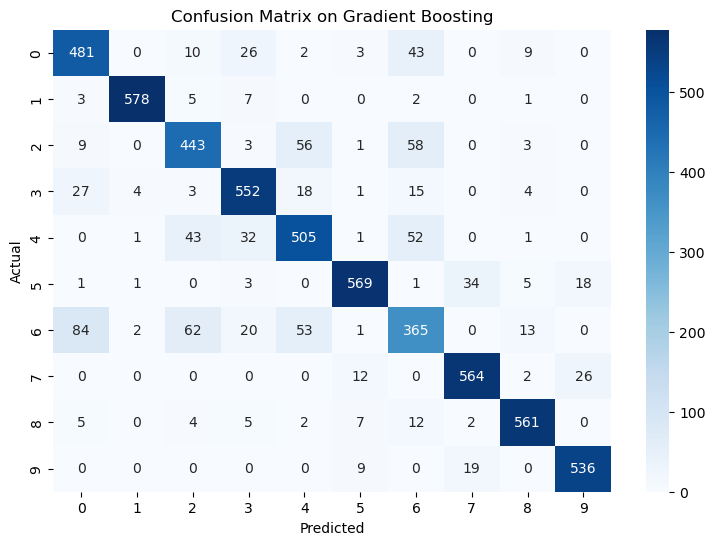

<Figure size 640x480 with 0 Axes>

In [42]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_gradient, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Gradient Boosting")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()
plt.savefig('Confusion Matrix Gradient Boosting.png')

- XGBoost

In [31]:
y_train_xgboost = xgb.predict(X_train_PCA1)
y_pred_xgboost = xgb.predict(X_test_pca)
xgb_train = metrics.accuracy_score(y_train,y_train_xgboost)
xgb_accuracy = metrics.accuracy_score(y_val, y_pred_xgboost)

print("Train Accuracy score: {}".format(xgb_train))
print("Test Accuracy score: {}".format(xgb_accuracy))
print(metrics.classification_report(y_val, y_pred_xgboost))

Train Accuracy score: 0.9990370370370371
Test Accuracy score: 0.8851666666666667
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       574
           1       1.00      0.97      0.99       596
           2       0.80      0.80      0.80       573
           3       0.89      0.90      0.90       624
           4       0.83      0.82      0.82       635
           5       0.97      0.94      0.95       632
           6       0.70      0.68      0.69       600
           7       0.93      0.97      0.95       604
           8       0.96      0.96      0.96       598
           9       0.96      0.96      0.96       564

    accuracy                           0.89      6000
   macro avg       0.88      0.89      0.88      6000
weighted avg       0.89      0.89      0.89      6000



/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categori

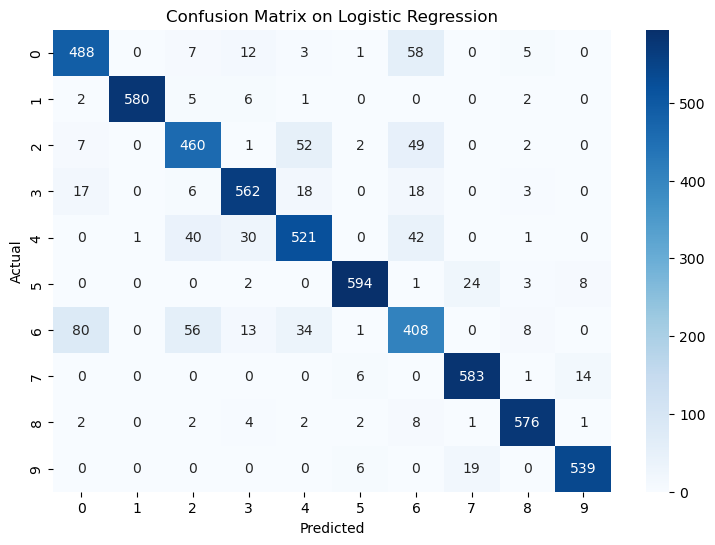

<Figure size 640x480 with 0 Axes>

In [32]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_xgboost, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on XGBoost")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()
plt.savefig('Confusion Matrix XGBoost.png')

# 모델 비교하기

In [35]:
Train_Accuracy = [logistic_train,svc_train,random_forest_train,gradient_train,xgb_train]
Test_Accuracy = [logistic_accuracy,svc_accuracy,random_forest_accuracy,gradient_accuracy,xgb_accuracy]
data1 = {
    'Algorithm': ['Logistic Regression','SVC','Random Forest Classifier','Gradient Boosting','XGBoost'],
    'Train Accuracy':Train_Accuracy,
    'Test Accuracy':Test_Accuracy
}

df1 = pd.DataFrame(data1)

In [36]:
df1

,Algorithm,Train Accuracy,Test Accuracy
0,Logistic Regression,0.846185,0.851000
1,SVC,0.942556,0.906000
2,Random Forest Classifier,1.000000,0.874833
3,Gradient Boosting,0.879241,0.859000
4,XGBoost,0.999037,0.885167


In [38]:
fig = go.Figure(data=[
    go.Bar(name='train set', x=data1['Algorithm'], y=data1['Train Accuracy'],text=np.round(data1['Train Accuracy'],2),textposition='outside'),
    go.Bar(name='test set', x=data1['Algorithm'], y=data1['Test Accuracy'],text=np.round(data1['Test Accuracy'],2),textposition='outside')
])

fig.update_layout(barmode='group',title_text='Accuracy Comparison On Different Models',yaxis=dict(
        title='Accuracy'))
fig.show()

# 위의 결과를 토대로 앙상블 만들기

In [39]:
from sklearn.ensemble import VotingClassifier

svm_xgb_ensemble_model = VotingClassifier(estimators=[('svm', svc), ('xgb', xgb)], voting='soft')
svm_Gradient_ensemble_model = VotingClassifier(estimators=[('svm', svc), ('Gradient', Gradient)], voting='soft')
smv_random_forest_ensemble_model = VotingClassifier(estimators=[('svm', svc), ('random_forest', random_forest)], voting='soft')
svm_logistic_ensemble_model = VotingClassifier(estimators=[('svm', svc), ('logistic', logistic)], voting='soft')

start = time.time()

svm_xgb_ensemble_model.fit(X_train_PCA1,y_train.ravel())

end = time.time()
svm_xgb_time = end-start

start = time.time()

svm_Gradient_ensemble_model.fit(X_train_PCA1,y_train)

end = time.time()
svm_Gradient_time = end-start

start = time.time()

smv_random_forest_ensemble_model.fit(X_train_PCA1,y_train)

end = time.time()
svm_rf_time = end-start

start = time.time()

svm_logistic_ensemble_model.fit(X_train_PCA1,y_train)

end = time.time()
svm_lr_time = end-start

print("SVC LR Time: {:0.2f} minute".format(svm_lr_time/60.0))
print("SVC Random Forest Time: {:0.2f} minute".format(svm_rf_time/60.0))
print("SVC Gradient Boosting Time: {:0.2f} minute".format(svm_Gradient_time/60.0))
print("SVC XGBoost Time: {:0.2f} minute".format(svm_xgb_time/60.0))

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:299: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:301: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:332: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:323: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



SVC LR Time: 1.78 minute
SVC Random Forest Time: 2.51 minute
SVC Gradient Boosting Time: 30.33 minute
SVC XGBoost Time: 2.34 minute


# 앙상블 모델 성능 평가

### SVM XGBoost 앙상블 모델

In [43]:
y_train_svm_xgboost = svm_xgb_ensemble_model.predict(X_train_PCA1)
y_pred_svm_xgboost = svm_xgb_ensemble_model.predict(X_test_pca)
svm_xgb_train = metrics.accuracy_score(y_train,y_train_svm_xgboost)
smv_xgb_accuracy = metrics.accuracy_score(y_val, y_pred_svm_xgboost)

print("Train Accuracy score: {}".format(svm_xgb_train))
print("Test Accuracy score: {}".format(smv_xgb_accuracy))
print(metrics.classification_report(y_val, y_pred_svm_xgboost))

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:299: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:301: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:332: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/home/user/anaconda3/lib/python3.11/site-packages/xgboost/data.py:323: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



Train Accuracy score: 0.9840185185185185
Test Accuracy score: 0.9025
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       574
           1       1.00      0.99      0.99       596
           2       0.84      0.84      0.84       573
           3       0.90      0.92      0.91       624
           4       0.86      0.84      0.85       635
           5       0.98      0.95      0.97       632
           6       0.73      0.72      0.73       600
           7       0.94      0.97      0.95       604
           8       0.97      0.97      0.97       598
           9       0.97      0.96      0.97       564

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



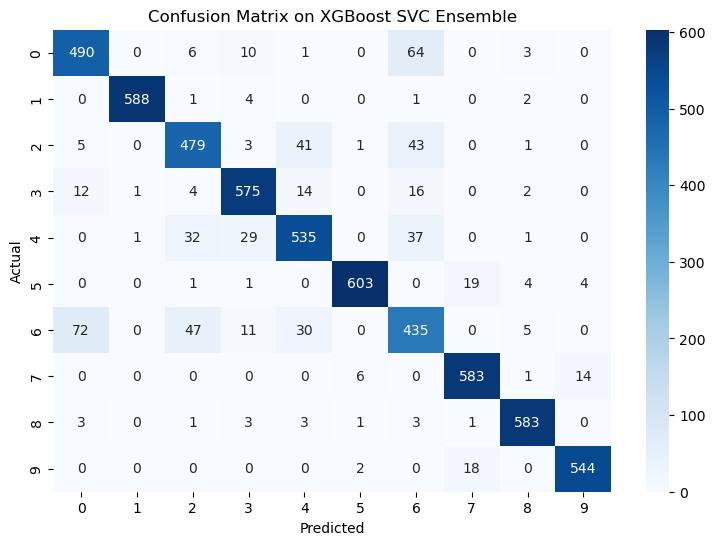

<Figure size 640x480 with 0 Axes>

In [44]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svm_xgboost, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on XGBoost SVC Ensemble")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()
plt.savefig('Confusion Matrix Xgb SVC ensemble.png')

###  SVM Gradient 앙상블 모델

In [45]:
y_train_svm_gradient = svm_Gradient_ensemble_model.predict(X_train_PCA1)
y_pred_svm_gradient = svm_Gradient_ensemble_model.predict(X_test_pca)
svm_gradient_train = metrics.accuracy_score(y_train,y_train_svm_gradient)
smv_gradient_accuracy = metrics.accuracy_score(y_val, y_pred_svm_gradient)

print("Train Accuracy score: {}".format(svm_gradient_train))
print("Test Accuracy score: {}".format(smv_gradient_accuracy))
print(metrics.classification_report(y_val, y_pred_svm_gradient))

Train Accuracy score: 0.9326851851851852
Test Accuracy score: 0.8993333333333333
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       574
           1       0.99      0.98      0.98       596
           2       0.84      0.83      0.83       573
           3       0.90      0.92      0.91       624
           4       0.85      0.84      0.84       635
           5       0.98      0.95      0.96       632
           6       0.73      0.71      0.72       600
           7       0.94      0.97      0.96       604
           8       0.96      0.98      0.97       598
           9       0.97      0.97      0.97       564

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



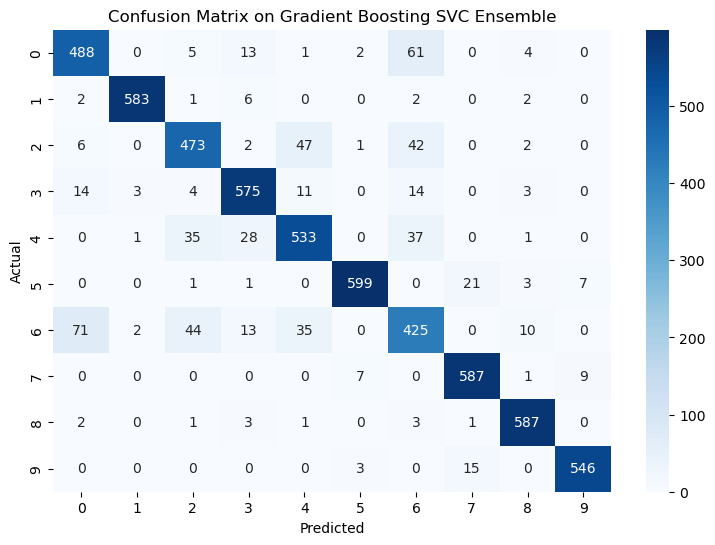

<Figure size 640x480 with 0 Axes>

In [50]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svm_gradient, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Gradient Boosting SVC Ensemble")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()
plt.savefig('Confusion Matrix Gradient Boosting SVC ensemble.png')

### SVM Logistic Regression ensemble

In [47]:
y_train_svm_LR = svm_logistic_ensemble_model.predict(X_train_PCA1)
y_pred_svm_LR = svm_logistic_ensemble_model.predict(X_test_pca)
svm_LR_train = metrics.accuracy_score(y_train,y_train_svm_LR)
smv_LR_accuracy = metrics.accuracy_score(y_val, y_pred_svm_LR)

print("Train Accuracy score: {}".format(svm_LR_train))
print("Test Accuracy score: {}".format(smv_LR_accuracy))
print(metrics.classification_report(y_val, y_pred_svm_LR))

Train Accuracy score: 0.923037037037037
Test Accuracy score: 0.8988333333333334
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       574
           1       0.99      0.98      0.99       596
           2       0.83      0.82      0.83       573
           3       0.90      0.92      0.91       624
           4       0.84      0.84      0.84       635
           5       0.98      0.95      0.96       632
           6       0.74      0.71      0.72       600
           7       0.93      0.96      0.95       604
           8       0.96      0.98      0.97       598
           9       0.97      0.96      0.97       564

    accuracy                           0.90      6000
   macro avg       0.90      0.90      0.90      6000
weighted avg       0.90      0.90      0.90      6000



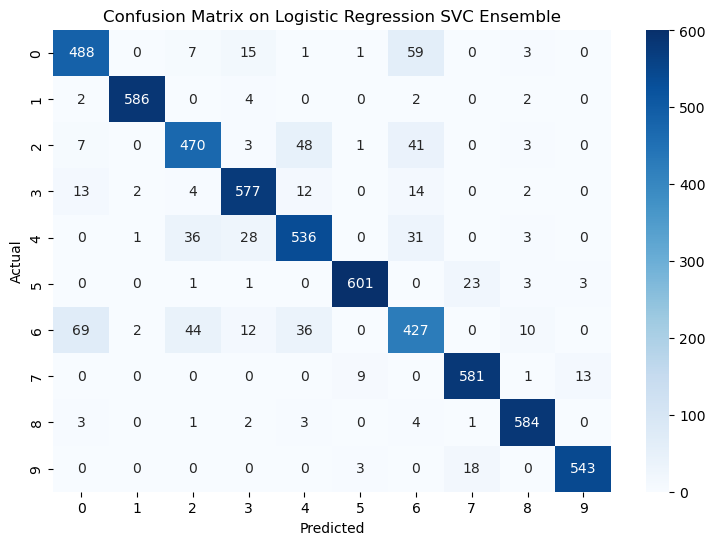

<Figure size 640x480 with 0 Axes>

In [49]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svm_LR, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Logistic Regression SVC Ensemble")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()
plt.savefig('Confusion Matrix Logistic Regression SVC ensemble.png')

### SVM Random Forest ensemble

In [51]:
y_train_svm_RF = smv_random_forest_ensemble_model.predict(X_train_PCA1)
y_pred_svm_RF = smv_random_forest_ensemble_model.predict(X_test_pca)
svm_RF_train = metrics.accuracy_score(y_train,y_train_svm_RF)
smv_RF_accuracy = metrics.accuracy_score(y_val, y_pred_svm_RF)

print("Train Accuracy score: {}".format(svm_RF_train))
print("Test Accuracy score: {}".format(smv_RF_accuracy))
print(metrics.classification_report(y_val, y_pred_svm_RF))

Train Accuracy score: 0.9798518518518519
Test Accuracy score: 0.907
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       574
           1       0.99      0.98      0.99       596
           2       0.84      0.86      0.85       573
           3       0.91      0.92      0.92       624
           4       0.86      0.85      0.86       635
           5       0.98      0.95      0.97       632
           6       0.75      0.73      0.74       600
           7       0.94      0.97      0.95       604
           8       0.97      0.98      0.97       598
           9       0.97      0.97      0.97       564

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



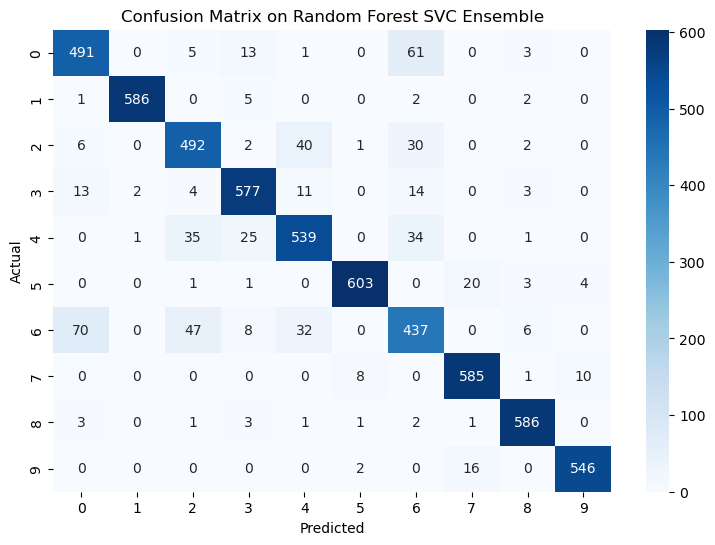

<Figure size 640x480 with 0 Axes>

In [52]:
con_matrix = pd.crosstab(pd.Series(y_val.values.flatten(), name='Actual' ),pd.Series(y_pred_svm_RF, name='Predicted'))
plt.figure(figsize = (9,6))
plt.title("Confusion Matrix on Random Forest SVC Ensemble")
sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')
plt.show()
plt.savefig('Confusion Matrix Random Forest SVC ensemble.png')